# Preamble

To use apecemathpy we can consider two ways, symbolic and numeric definitions of Higgs couplings. To do symbolic calculations we should use [sympy](https://www.sympy.org/en/index.html) library, for example we can use any funtion from sympy using the next one lines of commands:

In [1]:
import sympy as sp #import sympy
sp.init_printing() # pretty latex printer activation
sp.sqrt(4)

where we have used square root function of sympy library. Also we can work with symbolic variables with

In [2]:
xsym = sp.symbols('x')
sp.sqrt(xsym)

To numeric function we choose [numpy](https://numpy.org/) library, then, we can use square root of numpy library as follow

In [3]:
import numpy as np #import numpy
np.sqrt(4.0)

the main advantage of numpy is that work in a vectorial way, 

In [4]:
xnp = np.array([4.0,9.0,16.0,25.0,36.0])
np.sqrt(xnp)

array([2., 3., 4., 5., 6.])

in the example above the square root have been calculated over each component of `xnp` `np.array`. In principle, to work with spacemathpy we only need define a numeric version of our Higgs couplings, but if we can see our expressions is convenient to also define the symbolic version. To define both kinds of function, we do use `issymbolic` function defined in spacemathpy, which return `True` if someone of its arguments are sympy symbols(instances of `sp.symbols` function) or `False` otherwise. The next one is a example of this approach

In [5]:
from spacemathpy import * #import all functions of spacemathpy

In [6]:
def square_root(x):
    if issymbolic(x):
        return sp.sqrt(x)
    else:
        return np.sqrt(x)


The above function works well with numeric and symbolic approaches, for example

In [7]:
square_root(xsym)

In [8]:
square_root(xnp)

array([2., 3., 4., 5., 6.])

As final comment, spacemathpy have some global variables predefined, for example masses to $t$,$b$, $\tau$, $W$ and $Z$ particles are defined as a python dictionary as we can see in the next example

In [9]:
mW

{'value': 80.379, 'units': 'GeV', 'symbol': m_W}

so, if we need a numeric value we use

In [10]:
mW['value']

for symbolic representation we use

In [11]:
mW['symbol']

Also, constants like $g$ and $v$ (SM vev) are given by `g` and `SMvev` as we see above

In [12]:
g

{'value': 0.6534878048780488, 'unit': None, 'symbol': g}

In [13]:
SMvev

{'value': 246, 'units': 'GeV', 'symbol': v}

For a correct implementation of Higgs couplings we need use the predifined masses and constants.

Also we can plot our functions with matplotlib library. To plot we need use numpy `np.array` as follow

In [14]:
import matplotlib.pyplot as plt #import matplotlib.pyplot 
%matplotlib inline

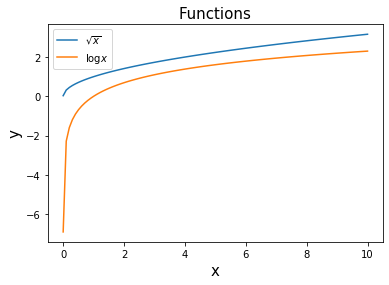

In [15]:
X = np.linspace(0.001,10,100)#range x np.array
plt.plot(X,square_root(X),label=r'$\sqrt{x}$');#Plot 1
plt.plot(X,np.log(X),label=r'$\log{x}$')#Plot 2 
plt.xlabel('x',fontsize=15);#x label
plt.ylabel('y',fontsize=15);#y label
plt.legend();#To show legends
plt.title('Functions',fontsize=15);#Title

# 2HDM

## Higgs couplings with fermions
In the context of 2HDM-III, the couplings $g_{htt}$, $g_{hbb}$, $g_{h\tau\tau}$ can be extracted of:

$$\mathcal{L}_Y^{hqq} = \frac{g}{2}\left(\frac{m_{d_{m}}}{m_{W}}\right) d_{m}\left[-\frac{\operatorname{sen} \alpha}{\cos \beta} \delta_{m n}+\frac{\sqrt{2} \cos (\alpha-\beta)}{g \cos \beta}\left(\frac{m_{W}}{m_{d_{m}}}\right)\left(\tilde{Y}_{2}^{d}\right)_{m n}\right] d_{n} h^{0}$$
$$+\frac{g}{2}\left(\frac{m_{u_{m}}}{m_{W}}\right) \bar{u}_{m}\left[\frac{\cos \alpha}{\operatorname{sen} \beta} \delta_{m n}-\frac{\sqrt{2} \cos (\alpha-\beta)}{g \operatorname{sen} \beta}\left(\frac{m_{W}}{m_{u_{m}}}\right)\left(\bar{Y}_{1}^{u}\right)_{m n}\right] u_{n} h^{0}$$

In python these couplings can be defined as functions $\alpha$, $\tan{\beta}$ and $C_{\alpha \beta} = \cos{(\alpha - \beta)}$. 

In [16]:
#2HDM-III
def ghtt_2hdm(α,Att,Cab,tb):
    global mW,mt,g,SMvev
    if issymbolic(α,Att,Cab,tb):
        MW,Mt= mW['symbol'],mt['symbol']
        return (g['symbol']/2)*(Mt/MW)*(sp.cos(α)/tb*sp.cos(sp.atan(tb)) + 
                sp.sqrt(2)*Cab/(g['symbol']*tb*sp.cos(sp.atan(tb)))*(MW/Mt)*(
                    Mt/SMvev['symbol'])*Att)
    else:
        MW,Mt= mW['value'],mt['value']
        return (g['value']/2)*(Mt/MW)*(np.cos(α)/tb*np.cos(np.arctan(tb)) + 
                np.sqrt(2)*Cab/(g['value']*tb*np.cos(np.arctan(tb)))*(MW/Mt)*(
                    Mt/SMvev['value'])*Att)

symbolic definition of variables

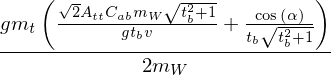

In [17]:
a,Att,Cab,tb = sp.symbols('alpha,A_{tt},C_{ab},t_b')
ghtt_2hdm(a,Att,Cab,tb)

numeric evaluation

In [18]:
ghtt_2hdm(0.1,0.2,0.3,0.4)

In [19]:
def ghbb_2hdm(α,Abb,Cab,tb):
    global mW,mb,g,SMvev
    if issymbolic(α,Abb,Cab,tb):
        MW,Mb= mW['symbol'],mb['symbol']
        return (g['symbol']/2)*(Mb/MW)*(-sp.sin(α)*tb/sp.sin(sp.atan(tb)) + 
                sp.sqrt(2)*(Cab*tb)/(g['symbol']*sp.sin(sp.atan(tb)))*(MW/Mb)*(
                    Mb/SMvev['symbol'])*Abb)
    else:
        MW,Mb= mW['value'],mb['value']
        return (g['value']/2)*(Mb/MW)*(-np.sin(α)*tb/np.sin(np.arctan(tb)) + 
                np.sqrt(2)*(Cab*tb)/(g['value']*np.sin(np.arctan(tb)))*(MW/Mb)*(
                    Mb/SMvev['value'])*Abb)

symbolic evaluation

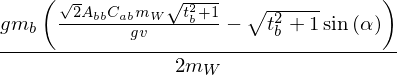

In [20]:
Abb = sp.symbols('A_bb')    
ghbb_2hdm(a,Abb,Cab,tb)

numeric evaluation

In [21]:
ghbb_2hdm(0.1,0.2,0.3,0.4)

In [22]:
def ghtautau_2hdm(α,Atata,Cab,tb):
    global mW,mta,g,SMvev
    if issymbolic(α,Atata,Cab,tb):
        MW,Mtau= mW['symbol'],mta['symbol']
        return (g['symbol']/2)*(Mtau/MW)*(-sp.sin(α)*tb/sp.sin(sp.atan(tb)) + 
                sp.sqrt(2)*(Cab*tb)/(g['symbol']*sp.sin(sp.atan(tb)))*(MW/Mtau)*(
                    Mtau/SMvev['symbol'])*Atata)
    else:
        MW,Mtau= mW['value'],mta['value']
        return (g['value']/2)*(Mtau/MW)*(-np.sin(α)/tb*np.sin(np.arctan(tb)) + 
                np.sqrt(2)*(Cab*tb)/(g['value']*np.sin(np.arctan(tb)))*(MW/Mtau)*(
                    Mtau/SMvev['value'])*Atata)

Atata = sp.symbols(r'A_{\tau\tau}')    
ghtautau_2hdm(a,Atata,Cab,tb)
ghtautau_2hdm(0.1,0.2,0.3,0.4)

## Higgs couplings with vector bosons
In the case of $g_{hWW}$ and $g_{hZZ}$ the couplings in the $2HDM$ are given by

$$\mathcal{L}_{hVV} = g m_{V} \sin{(\alpha - \beta)}$$ 

where $V = W,Z$. The corresponding functions in python are given as follow

In [23]:
def ghww_2hdm(sab):
    global mW,g
    if issymbolic(sab):
        MW,gg= mW['symbol'],g['symbol']
        return gg*MW*sab
    else:
        MW,gg= mW['value'],g['value']
        return gg*MW*sab

sab = sp.symbols('s_{ab}',real=True)
ghww_2hdm(sab)
ghww_2hdm(0.1)

In [24]:
def ghzz_2hdm(sab):
    global mZ,g
    if issymbolic(sab):
        MZ,gg= mZ['symbol'],g['symbol']
        return gg*MZ*sab
    else:
        MZ,gg= mZ['value'],g['value']
        return gg*MZ*sab

#sab = sp.symbols('s_{ab}',real=True)
ghzz_2hdm(sab)
ghzz_2hdm(0.1)

## Initial parameter space

In [25]:
n = 200000
Cab = np.random.uniform(-1.0,1.0,n)
tb = np.random.uniform(0.01,40.0,n)
Att = np.random.uniform(0.0,1.0,n)
Abb = np.random.uniform(0.0,1.0,n)
mCH = np.random.uniform(200,1000,n)
parameters = {'Cab':Cab,'tb':tb,'Att':Att,'Abb':Abb}

## Allowed parameter space

We calculate the allowed parameter space to each signal

### $$R_{\tau}$$

In [26]:
data_rtau = Rtau.parameter_space_pandas([
         ghtt_2hdm(np.arccos(Cab) + np.arctan(tb),Att,Cab,tb),
         ghbb_2hdm(np.arccos(Cab) + np.arctan(tb),Att,Cab,tb),
         ghtautau_2hdm(np.arccos(Cab) + np.arctan(tb),1,Cab,tb)
],parameters)

/home/moises/miniconda3/lib/python3.7/site-packages/spacemathpy/RXX.py:41: RuntimeWarning: invalid value encountered in sqrt
  return -(1.0/4.0)*(np.log((1+np.sqrt(1-((4*mtop**2)/(mS**2)))))/(1-np.sqrt(1-((4*mtop**2)/(mS**2))))-1j*np.pi)**2;#MODIFICADO#(-sp.I*np.pi)
/home/moises/miniconda3/lib/python3.7/site-packages/spacemathpy/RXX.py:68: RuntimeWarning: invalid value encountered in arcsin
  return np.arcsin(np.sqrt((mS**2)/(4*mbot**2)))**2;


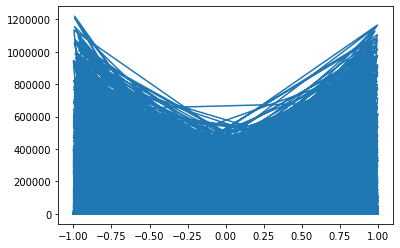

In [27]:
Y = Rtau.func(ghtt_2hdm(-np.arccos(Cab) + np.arctan(tb),Att,Cab,tb),
         ghbb_2hdm(-np.arccos(Cab) + np.arctan(tb),Att,Cab,tb),
         ghtautau_2hdm(-np.arccos(Cab) + np.arctan(tb),1,Cab,tb))
plt.plot(Cab,Y);

In [28]:
data_rtau['1s'];

In [29]:
latex_names = {'Cab':r'$\cos(\alpha -\beta)$',
        'tb':r'$\tan(\beta)$',
        'Att':r'$A_{tt}$','Abb':r'$A_{bb}$','Rtau':r'$R_{\tau}$',
        'Rb':r'$R_b$',
        'Rgamma':r'$R_{\gamma}$',
        'Rw':r'$R_{W}$',
        'Rz':r'$R_{Z}$'}

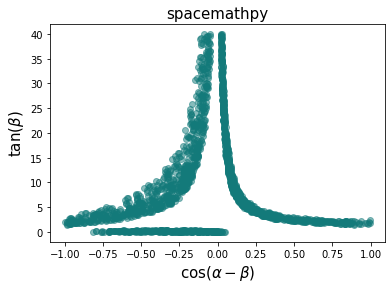

In [30]:
plot_df(data_rtau['1s'],colx='Cab',coly='tb',
        latex_names=latex_names)

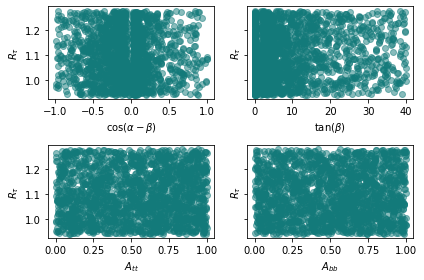

In [31]:
plot_tabledf(data_rtau['1s'],Rtau.latex_name,
             latex_names=latex_names)

### $$R_{b}$$

In [32]:
data_rb= Rb.parameter_space_pandas([
         ghtt_2hdm(-np.arccos(Cab) + np.arctan(tb),Att,Cab,tb),
         ghbb_2hdm(-np.arccos(Cab) + np.arctan(tb),Att,Cab,tb)
],parameters)

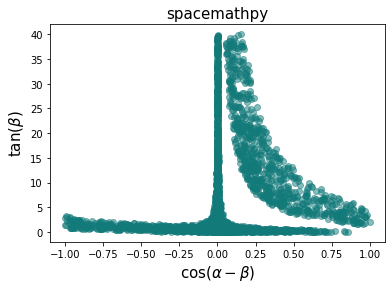

In [33]:
plot_df(data_rb['1s'],colx='Cab',coly='tb',
        latex_names=latex_names)

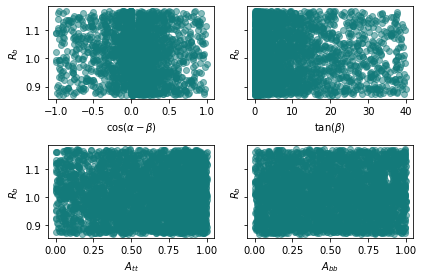

In [34]:
plot_tabledf(data_rb['1s'],Rb.latex_name,
             latex_names=latex_names)

### $$R_{\gamma}$$

In [35]:
data_rga = Rgamma.parameter_space_pandas([
         ghtt_2hdm(-np.arccos(Cab) + np.arctan(tb),Att,Cab,tb),
         ghbb_2hdm(-np.arccos(Cab) + np.arctan(tb),Att,Cab,tb),
         ghww_2hdm(np.sqrt(1-Cab**2)),0,1000
],parameters)

/home/moises/miniconda3/lib/python3.7/site-packages/spacemathpy/RXX.py:164: RuntimeWarning: invalid value encountered in sqrt
  return -(1.0/4.0)*(np.log((1+np.sqrt(1-x))/(1-np.sqrt(1-x)))-1j*np.pi)**2; #######MODIFICADO#########(-sp.I*np.pi)
/home/moises/miniconda3/lib/python3.7/site-packages/spacemathpy/RXX.py:211: RuntimeWarning: invalid value encountered in sqrt
  return -(1.0/4)*(np.log((1+np.sqrt(1-x)/(1-np.sqrt(1-x))))-1j*np.pi)**2;#######MODIFICADO#########(-sp.I*sp.pi)


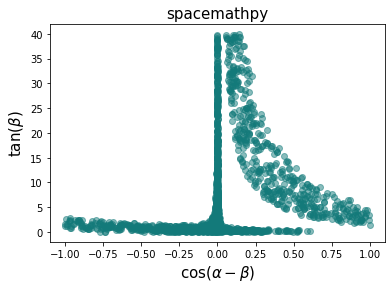

In [36]:
plot_df(data_rga['1s'],colx='Cab',coly='tb',
        latex_names=latex_names)

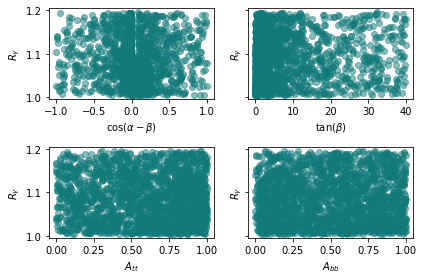

In [37]:
plot_tabledf(data_rga['1s'],Rgamma.latex_name,
             latex_names=latex_names)

### $$R_{W}$$

In [38]:
data_rw = Rw.parameter_space_pandas([
         ghtt_2hdm(-np.arccos(Cab) + np.arctan(tb),Att,Cab,tb),
         ghbb_2hdm(-np.arccos(Cab) + np.arctan(tb),Att,Cab,tb),
         ghww_2hdm(np.sqrt(1-Cab**2))
],parameters)

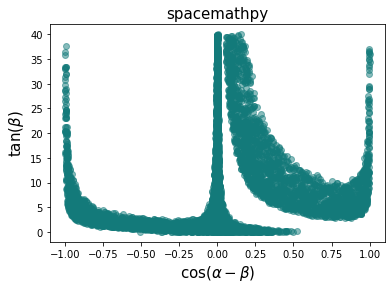

In [39]:
plot_df(data_rw['1s'],colx='Cab',coly='tb',
        latex_names=latex_names)

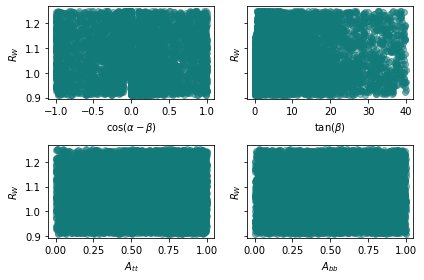

In [40]:
plot_tabledf(data_rw['1s'],Rw.latex_name,
             latex_names=latex_names)

### $$R_{Z}$$

In [41]:
data_rz = Rz.parameter_space_pandas([
         ghtt_2hdm(-np.arccos(Cab) + np.arctan(tb),Att,Cab,tb),
         ghbb_2hdm(-np.arccos(Cab) + np.arctan(tb),Att,Cab,tb),
         ghzz_2hdm(np.sqrt(1-Cab**2))
],parameters)

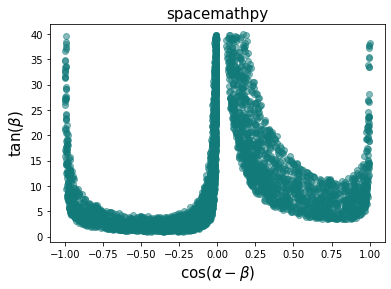

In [42]:
plot_df(data_rz['1s'],colx='Cab',coly='tb',
        latex_names=latex_names)

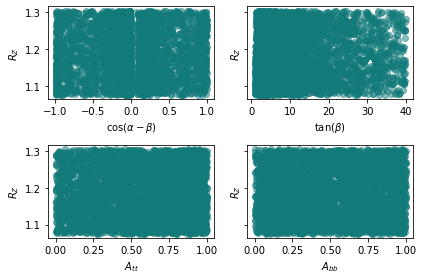

In [43]:
plot_tabledf(data_rz['1s'],Rz.latex_name,
             latex_names=latex_names)

## All signal strengths

Using directly matplotlib

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

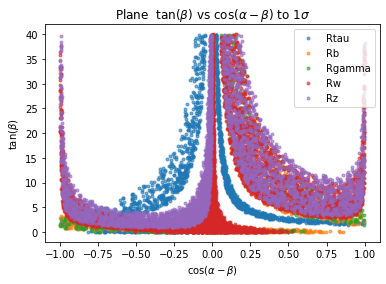

In [45]:
data1s = {'Rtau':data_rtau['1s'],'Rb':data_rb['1s'],'Rgamma':data_rga['1s'],
          'Rw':data_rw['1s'],'Rz':data_rz['1s']}
plt.figure()
for k in data1s.keys():
    plt.plot(data1s[k]['Cab'],data1s[k]['tb'],'.',label=k,alpha=0.6)
plt.xlabel(r'$\cos(\alpha -\beta)$');
plt.ylabel(r'$\tan(\beta)$');
plt.title(r'Plane  $\tan(\beta)$ vs $\cos(\alpha -\beta)$ to 1$\sigma$')
plt.legend();
#plt.savefig('Rxs.png');